In [2]:
from tsnecuda import TSNE
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import faiss

In [3]:
s_path = './OfficeHome/s2t_shot/s0_t1_2020.npz'
s = np.load(s_path)
sf, tf = s['s'], s['t']
sx, sy = sf[:, :-1], sf[:, -1]
tx, ty = tf[:, :-1], tf[:, -1]

In [79]:
sc = np.stack([sx[sy == i].mean(axis=0) for i in range(65)])
scy = np.arange(65)

sy = np.r_[np.ones(len(tx))*65, tcy]

sx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(np.r_[sx, sc])

tc = np.stack([tx[ty == i].mean(axis=0) for i in range(65)])
tcy = np.arange(65)

ty = np.r_[np.ones(len(tx))*65, tcy]

tx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(np.r_[tx, tc])

In [83]:
stx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(np.r_[sx, sc, tc])
sty = np.tile(np.arange(65), 2)

In [15]:
s_path = './OfficeHome/s2t_shot/s0_t1.npz'
s = np.load(s_path)
sf, tf = s['s'], s['t']
sx, sy = sf[:, :-1], sf[:, -1]
tx, ty = tf[:, :-1], tf[:, -1]

# sc = np.stack([sx[sy == i].mean(axis=0) for i in range(65)])

# kmeans = faiss.Kmeans(tx.shape[1], 65, niter=300, nredo=5, gpu=True, seed=1284)
# kmeans.train(tx.astype('float32'), init_centroids=sc.astype('float32'))
# t_pred = kmeans.index.search(tx.astype('float32'), 1)[1].flatten()

In [30]:
data_path = '../../simsiam/data//s0_1126.npz'
data = np.load(data_path)

# t_data = np.load('./OfficeHome/s1_1126_0.9.npz')
sf = data['sf']
# tf = t_data['s']
sx, sy = sf[:, :-1], sf[:, -1]
# tx, ty = tf[:, :-1], tf[:, -1]

# data_path = './OfficeHome/dann/s0_t1.npz'
# data = np.load(data_path)

# t_data = np.load('./OfficeHome/s1_12846.npz')
# sf = data['s']
# tf = t_data['s']
# sx, sy = sf[:, :-1], sf[:, -1]
# tx, ty = tf[:, :-1], tf[:, -1]

# # data_path = './OfficeHome/dann/s0_t1.npz'
# # data = np.load(data_path)
# # sf, tf = data['s'], data['t']
# # sx, sy = sf[:, :-1], sf[:, -1]
# # tx, ty = tf[:, :-1], tf[:, -1]
tx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(tx)

In [10]:
s_path = './OfficeHome/kmeans_direct_source_only/s0_t1_65.npz'
img_path = './OfficeHome/source_only/s0_t1.npz'
f = np.load(s_path)
img = np.load(img_path)
sf, tf = f['s'], f['t']

tx = tf[:, :-1]
ty = img['t'][:, -1]
sx, sy = sf[:, :-1], sf[:, -1]

In [4]:
ssy = np.zeros_like(sy)
tty = np.ones_like(ty)
cx = np.r_[sx, tx]
cy = np.r_[ssy, tty]

In [5]:
cx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10, random_seed=1284).fit_transform(cx)

In [6]:
sx_tsne = cx_tsne[:sy.shape[0]]
tx_tsne = cx_tsne[sy.shape[0]:]

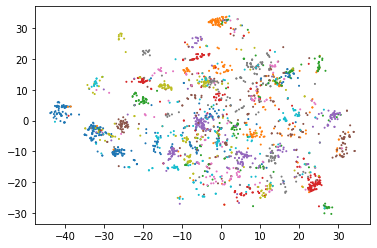

In [7]:
plt.scatter(sx_tsne[:, 0], sx_tsne[:, 1], s=1, c=sy, cmap='tab10')
plt.show()

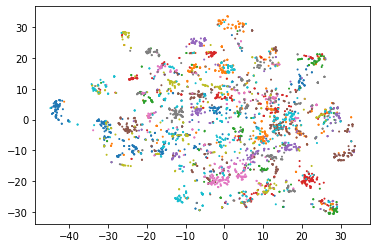

In [8]:
plt.scatter(tx_tsne[:, 0], tx_tsne[:, 1], s=1, c=ty, cmap='tab10')
plt.show()

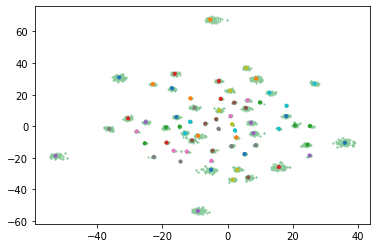

In [80]:
plt.scatter(sx_tsne[:-65, 0], sx_tsne[:-65, 1], s=1, c='#88c999')
plt.scatter(sx_tsne[-65:, 0], sx_tsne[-65:, 1], s=10, c=sy[-65:], cmap='tab10')
plt.show()

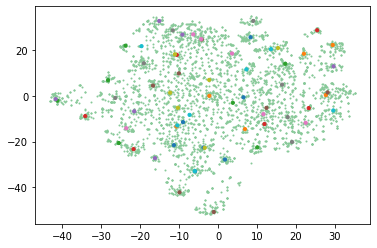

In [81]:
plt.scatter(tx_tsne[:-65, 0], tx_tsne[:-65, 1], s=1, c='#88c999')
plt.scatter(tx_tsne[-65:, 0], tx_tsne[-65:, 1], s=10, c=ty[-65:], cmap='tab10')
plt.show()

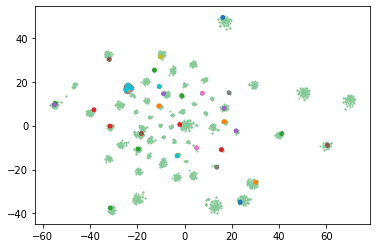

In [91]:
plt.scatter(stx_tsne[:-130, 0], stx_tsne[:-130, 1], s=1, c='#88c999')
# plt.scatter(stx_tsne[-130:-65, 0], stx_tsne[-130:-65, 1], s=5, c='hotpink')
plt.scatter(stx_tsne[-65:, 0], stx_tsne[-65:, 1], s=15, c=sty[-65:], cmap='tab10')
plt.show()

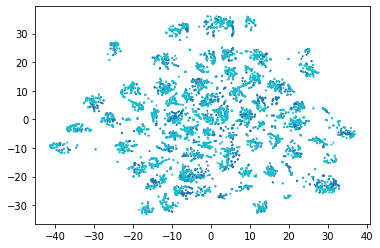

In [61]:
plt.scatter(cx_tsne[:, 0], cx_tsne[:, 1], s=1, c=cy, cmap='tab10')